In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Unemployment-in-America-Per-US-State.csv')
data

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2
...,...,...,...,...,...,...,...,...,...,...,...
29887,51,Virginia,2022,12,"6,862,585","4,470,272",65.1,"4,330,531",63.1,"139,741",3.1
29888,53,Washington,2022,12,"6,254,253","4,015,286",64.2,"3,832,769",61.3,"182,517",4.5
29889,54,West Virginia,2022,12,"1,434,789","784,323",54.7,"752,464",52.4,"31,859",4.1
29890,55,Wisconsin,2022,12,"4,753,700","3,068,610",64.6,"2,976,670",62.6,"91,940",3.0


In [3]:
# ensuring there are no null values
data.isna().sum()

FIPS Code                                                    0
State/Area                                                   0
Year                                                         0
Month                                                        0
Total Civilian Non-Institutional Population in State/Area    0
Total Civilian Labor Force in State/Area                     0
Percent (%) of State/Area's Population                       0
Total Employment in State/Area                               0
Percent (%) of Labor Force Employed in State/Area            0
Total Unemployment in State/Area                             0
Percent (%) of Labor Force Unemployed in State/Area          0
dtype: int64

In [4]:
# deleting FIPS Code - unuseful
del data['FIPS Code']

In [5]:
# Mathematical insights about data
data.describe()

,Year,Month,Percent (%) of State/Area's Population,Percent (%) of Labor Force Employed in State/Area,Percent (%) of Labor Force Unemployed in State/Area
count,29892.000000,29892.00000,29892.000000,29892.000000,29892.000000
mean,1999.000000,6.50000,65.516202,61.670417,5.920788
std,13.564887,3.45211,4.304355,4.739074,2.207521
min,1976.000000,1.00000,51.000000,41.600000,1.900000
25%,1987.000000,3.75000,62.800000,58.600000,4.300000
50%,1999.000000,6.50000,65.900000,61.800000,5.500000
75%,2011.000000,9.25000,68.500000,65.100000,7.100000
max,2022.000000,12.00000,75.700000,73.100000,30.600000


In [6]:
data['Month'] = pd.to_datetime(data['Month'].astype(str), format='%m').dt.month
data['Year_Month'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [15]:
# removing commas
numeric_cols = ['Total Civilian Non-Institutional Population in State/Area',
                'Total Civilian Labor Force in State/Area',
                'Total Employment in State/Area',
                'Total Unemployment in State/Area']
    
for col in numeric_cols:
   data[col] = pd.to_numeric(data[col].replace(',', ''))

In [16]:
# Calculate the unemployment rate:
data['Unemployment Rate'] = data['Total Unemployment in State/Area'] / data['Total Civilian Labor Force in State/Area'] * 100
data['Unemployment Rate']

0         6.637140
1         7.093762
2        10.190536
3         7.271744
4         9.193465
           ...    
29887     3.126007
29888     4.545554
29889     4.061974
29890     2.996145
29891     3.865188
Name: Unemployment Rate, Length: 29892, dtype: float64

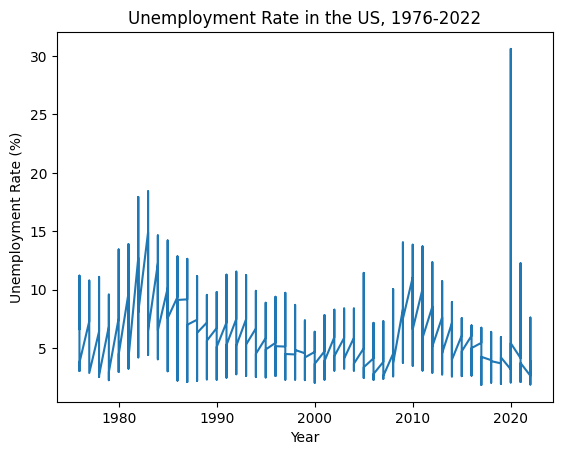

In [17]:
# display unemployment rate
plt.plot(data['Year'], data['Unemployment Rate'])
plt.title('Unemployment Rate in the US, 1976-2022')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

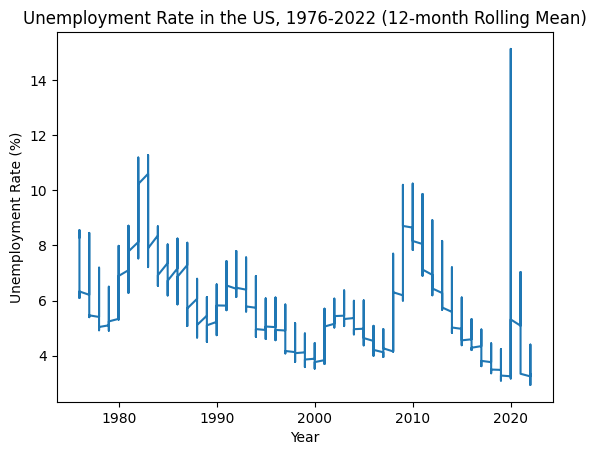

In [18]:
# displaying mean of unemployment rate
data['Unemployment Rate (Rolling Mean)'] = data['Unemployment Rate'].rolling(window=12).mean()
plt.plot(data['Year'], data['Unemployment Rate (Rolling Mean)'])
plt.title('Unemployment Rate in the US, 1976-2022 (12-month Rolling Mean)')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [19]:
# The above graphs are interesting, but I would love to see these on a state by state case (i.e., SC, CA, WY, etc.)